In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

# Analisis univariado de la capitalizacion de las criptomonedas

In [8]:
analisis = pd.read_json('../data/top_50_coins.json')
analisis.drop(columns=["image", "roi", "current_price", "max_supply"], inplace=True)
analisis.head()

,id,symbol,name,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,...,market_cap_change_percentage_24h,circulating_supply,total_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,2166351787943,1,2166351787943,19248671189,109574.00,107876.000000,861.730000,...,0.81753,1.988880e+07,1.988880e+07,111814.00,-2.49758,2025-05-22T18:41:28.492Z,67.810000,1.606774e+05,2013-07-06T00:00:00.000Z,2025-07-07T09:10:59.937Z
1,ethereum,eth,Ethereum,311465590739,2,311465590739,10178254759,2598.09,2507.370000,65.130000,...,2.60376,1.207169e+08,1.207169e+08,4878.26,-47.04228,2021-11-10T14:24:19.604Z,0.432979,5.965609e+05,2015-10-20T00:00:00.000Z,2025-07-07T09:11:01.655Z
2,tether,usdt,Tether,158581986370,3,158581986370,38607044196,1.00,0.999912,-0.000118,...,-0.02292,1.585817e+11,1.585817e+11,1.32,-24.41903,2018-07-24T00:00:00.000Z,0.572521,7.466753e+01,2015-03-02T00:00:00.000Z,2025-07-07T09:10:56.490Z
3,ripple,xrp,XRP,134226995383,4,227208867494,2176743916,2.29,2.250000,0.024684,...,1.17156,5.906819e+10,9.998597e+10,3.40,-33.09811,2018-01-07T00:00:00.000Z,0.002686,8.454082e+04,2014-05-22T00:00:00.000Z,2025-07-07T09:10:55.265Z
4,binancecoin,bnb,BNB,96721163010,5,96721163010,646818500,665.17,654.110000,8.320000,...,1.25014,1.458876e+08,1.458876e+08,788.84,-15.97480,2024-12-04T10:35:25.220Z,0.039818,1.664555e+06,2017-10-19T00:00:00.000Z,2025-07-07T09:10:59.029Z


## Grafico Volumen vs Capitalizacion

Text(0, 0.5, 'Total Volume Normalized')

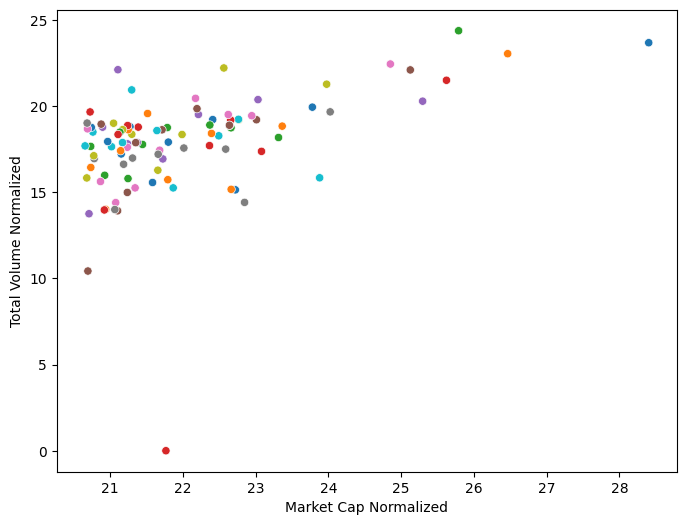

In [9]:
analisis["market_cap_norm"] = np.log(analisis["market_cap"] + 1)
analisis["total_volume_norm"] = np.log(analisis["total_volume"] + 1)

plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=analisis,
    x='market_cap_norm',
    y='total_volume_norm',
    hue='name',
    palette='tab10',
    legend=False
)

ax.set_xlabel('Market Cap Normalized')
ax.set_ylabel('Total Volume Normalized')

## Grafico Volumen vs Capitalizacion menor a 10 % 

Text(0, 0.5, 'Total Volume Normalized')

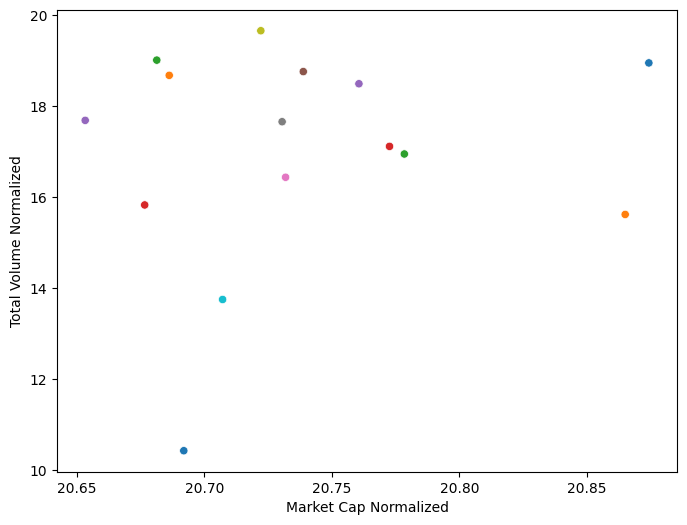

In [10]:
pct = 0.15
corte_cap = analisis['market_cap'].quantile(pct)
cap = analisis[analisis['market_cap'] < corte_cap]

plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=cap,
    x='market_cap_norm',
    y='total_volume_norm',
    hue='name',
    palette='tab10',
    legend=False
)

ax.set_xlabel('Market Cap Normalized')
ax.set_ylabel('Total Volume Normalized')

In [11]:
selected_coins_name = cap['name'].to_list()
selected_coins_symbol = cap['symbol'].to_list()



print("Name Coins Selected:", selected_coins_name, "\n", "Symbol Coins Selected: ", selected_coins_symbol, "\n", "Amount: ", len(selected_coins_name))

Name Coins Selected: ['Celestia', 'Flare', 'Polygon Bridged USDT (Polygon)', 'XDC Network', 'Injective', 'Virtuals Protocol', 'Stacks', 'Sonic', 'Binance Bridged USDC (BNB Smart Chain)', 'Mantle Staked Ether', 'StakeWise Staked ETH', 'Optimism', 'Pudgy Penguins', 'SyrupUSDC', 'Story'] 
 Symbol Coins Selected:  ['tia', 'flr', 'usdt', 'xdc', 'inj', 'virtual', 'stx', 's', 'usdc', 'meth', 'oseth', 'op', 'pengu', 'syrupusdc', 'ip'] 
 Amount:  15


# Guardado de cryptomonedas selecionadas

In [13]:
with open('../data/selected_coins.json', 'w', encoding='utf-8') as f:
    json.dump(selected_coins_symbol, f, ensure_ascii=False, indent=2)